# ***Penguins Data Science Predictive Modeling***

We shall predict for the spice of the Penguins and the body mass in grams as required by the assessment to show regression and classification skills <br>

The features include

- Species
- Body Mass In Grams (body_mass_g)

# **Importing Libraries**

In [ ]:
%%capture
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install google-colab
!pip install imbalanced-learn

# **Importing Libraries**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

We load and import the necessary modules neede for the analysis.

### ***Generate Random SEED and RandomState***

In [ ]:
# Generate random SEED
np.random.seed(2023)
SEED = (int) ((np.random.rand()) * (14+8))
STATE = np.random.mtrand.RandomState(SEED)
print(SEED)
print(STATE)

7
RandomState(MT19937)


Generates the random seed, for the reproducerbility of the results, necessary for model comparison since we doing both regression and classification.

### ***Load the data from local repository***

In [ ]:
# load the required data
PATH = './data/'
data = pd.read_csv(os.path.join(PATH,'penguins.csv'))
data.head()

We load the data, from local storage

### ***Load date from Google Drive***

In [ ]:
# load data from  google drive
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/My Drive/data/'
data = pd.read_csv(os.path.join(PATH,'penguins.csv')) # change path to your path
data.head()

Mounted at /content/drive


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We load the data from the mounted google drive
This is best, since it automates the process of data loading

### ***Data Preprocessing, Cleaning and Validation***

In this section, we do the following as accorded in the instructions
- Data validation
- Data Preprocessing
- Data Cleaning

##### *Data Type Check*

In [ ]:
# data type check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


We explore the dataframe load from read_csv to show data types and entires, this seems to suggest that we have 343 entires from the dataset

##### *Check for missing values*

In [ ]:
# check for missing values
data.isna().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

We check for the missing values and it shows that sex has 11 missing and 2 mising from eaxh the numeric columns

##### Check for repeated values

In [ ]:
# check for repeated values
data.duplicated().sum()

0

There are not instances of duplicate values which susggest that our observations are uniqu.

##### *Extract numerical columns*

In [ ]:
# list numeric columns
numericals =['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

numericals

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

For convince we list the numerical columns in out data set for easy analysis.

##### *Extract categorical columns*

In [ ]:
# list categorical columns
categorical = ['sex', 'island', 'species']
categorical

['sex', 'island', 'species']

For convince we do the same for he categorical
Columns

##### *Sample Prediction Features*

In [ ]:
features = ['speices', 'body_mass_g']
features

['speices', 'body_mass_g']

We extract the columns for the features that we shall be predicting and these include the multi class species variable and numeric body mass in grams

##### *Check for outliers*

In [ ]:
# check for outliers
data[numericals].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


We start our statistical anaysis, with the description of the numerical properties of penguin and across all of them,
The means and medians are not so much far from each other which seems to suggest less skewed data, we shall go deeper to analysis the skewness next.

In [ ]:
data[numericals].skew()

bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64

The skewness values accross all the variables, seem to suggest that the variables are relatively normally distributed.

##### *Check for data distribution for numerical variables*

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

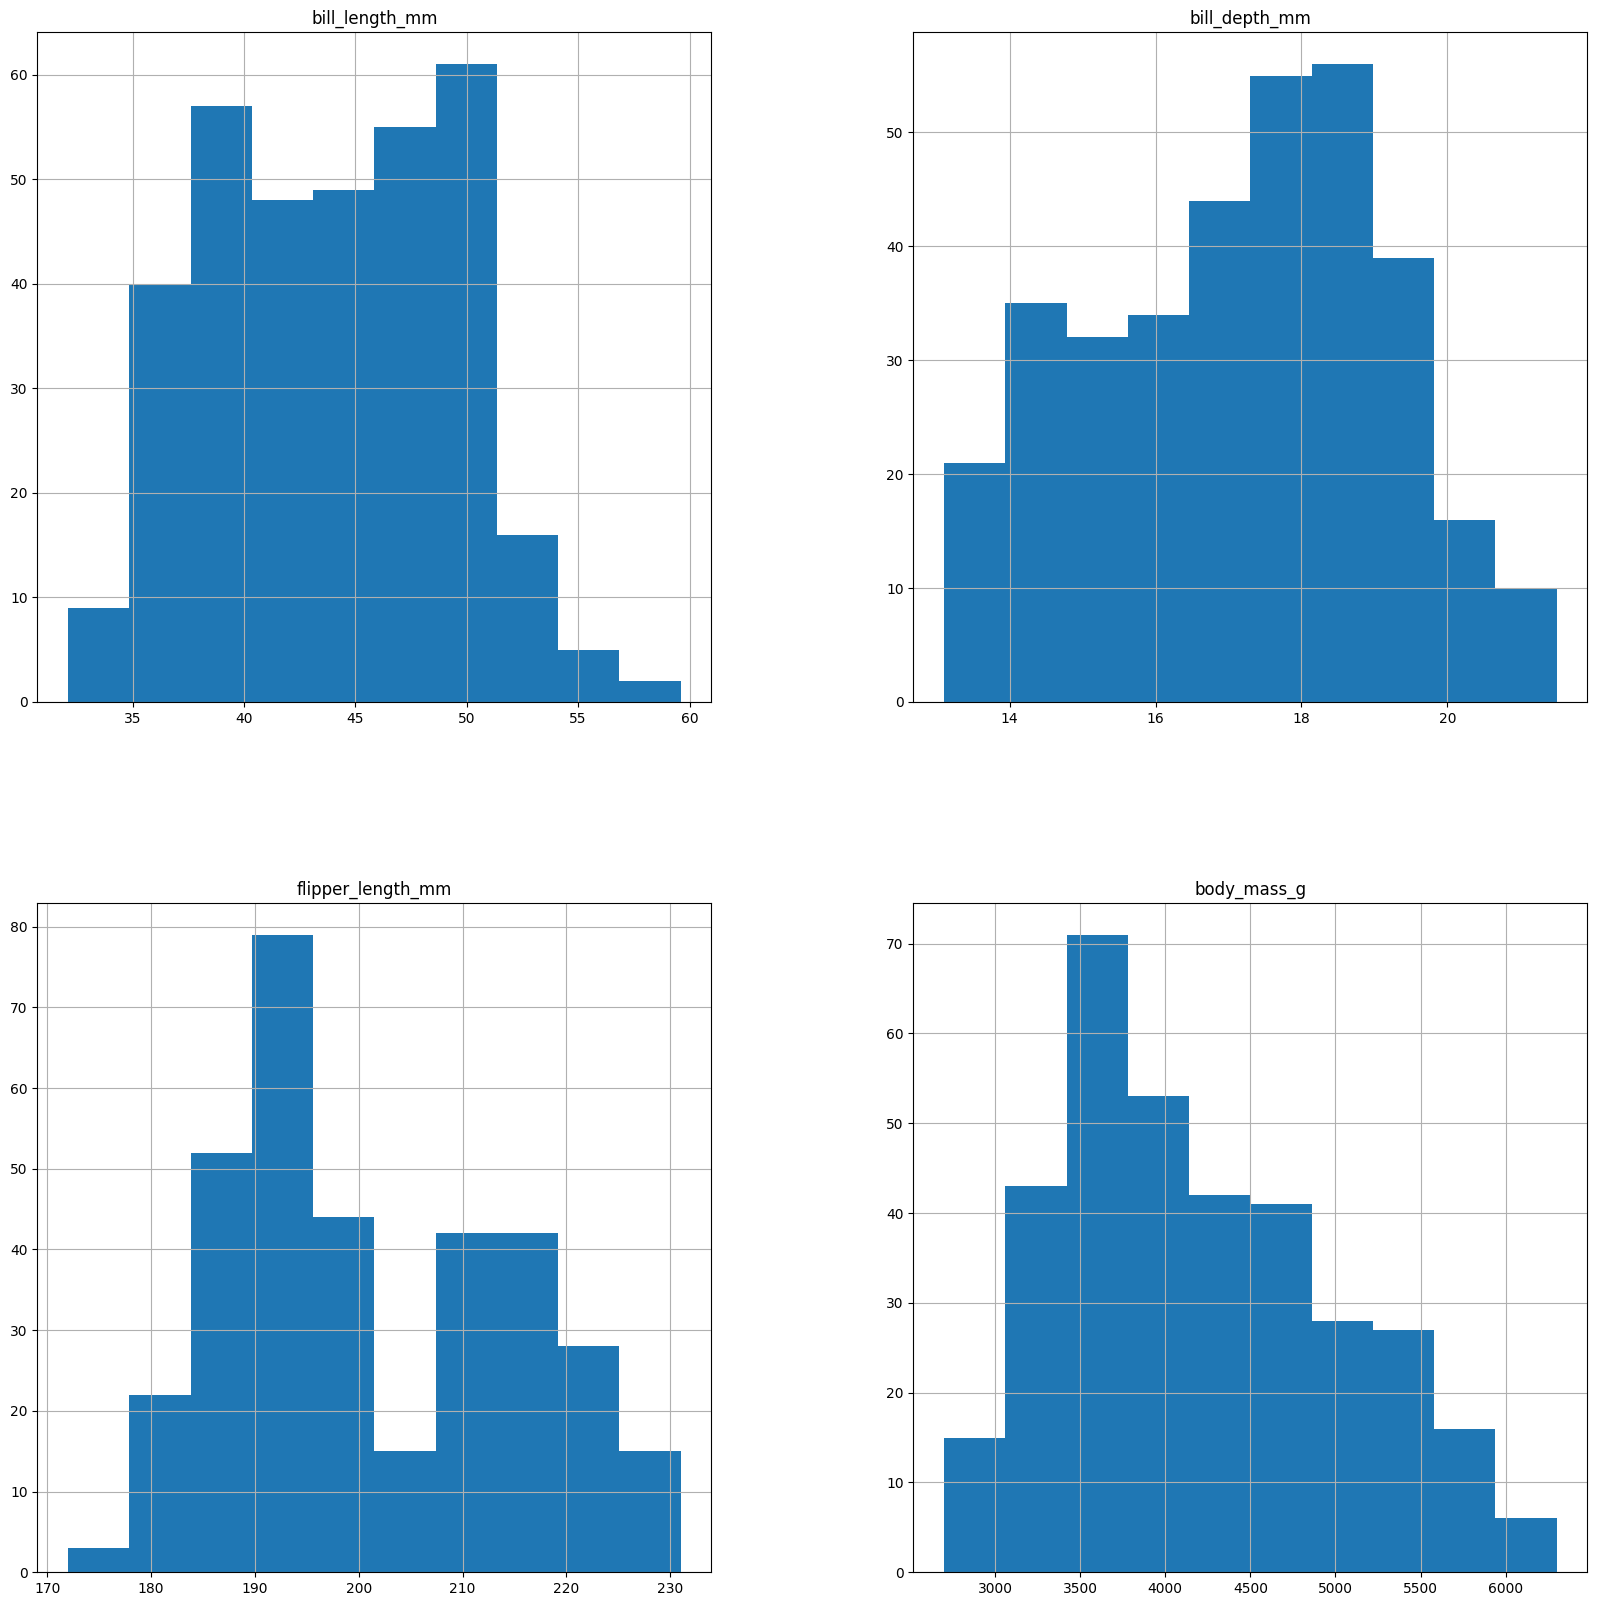

In [ ]:
# check for data distribution for numerical variables
data[numericals].hist(figsize=(20,20))

The histogram plots also seem to suggest the same stants, the visuals trace out a relatively normal curve

##### *Check for correlation between variables*

In [ ]:
# check for correlation between variables
data[numericals].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


Here we explore the inter variable relationship, and this prompts us to calcute the correlations which are based on the peason correlation coefficient. These seem to suggest a strong relationship between body mass and flipper length and also that there are no instances of perfect predictors.

<Axes: >

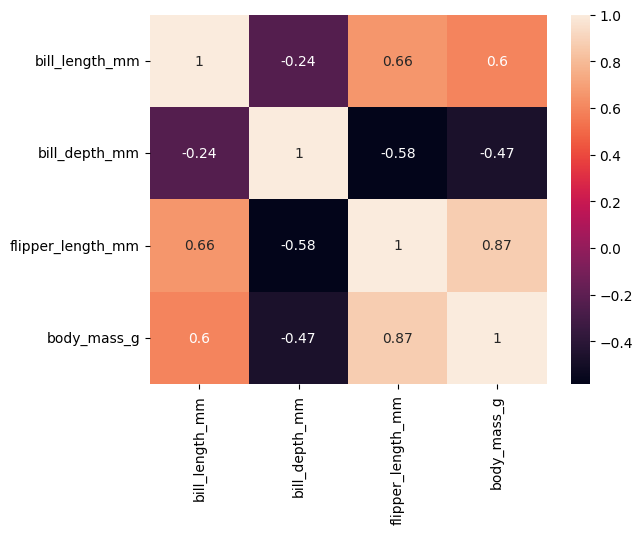

In [ ]:
sns.heatmap(data[numericals].corr(), annot=True)

We go ahead and plot a heatmap to emphasise the strengh of the linear relationships, which suggests that we can continue and do modeling on these variables for the target numeric variable body_mass_g, because the of the existing relationship, the direction doesnt matter for this case.

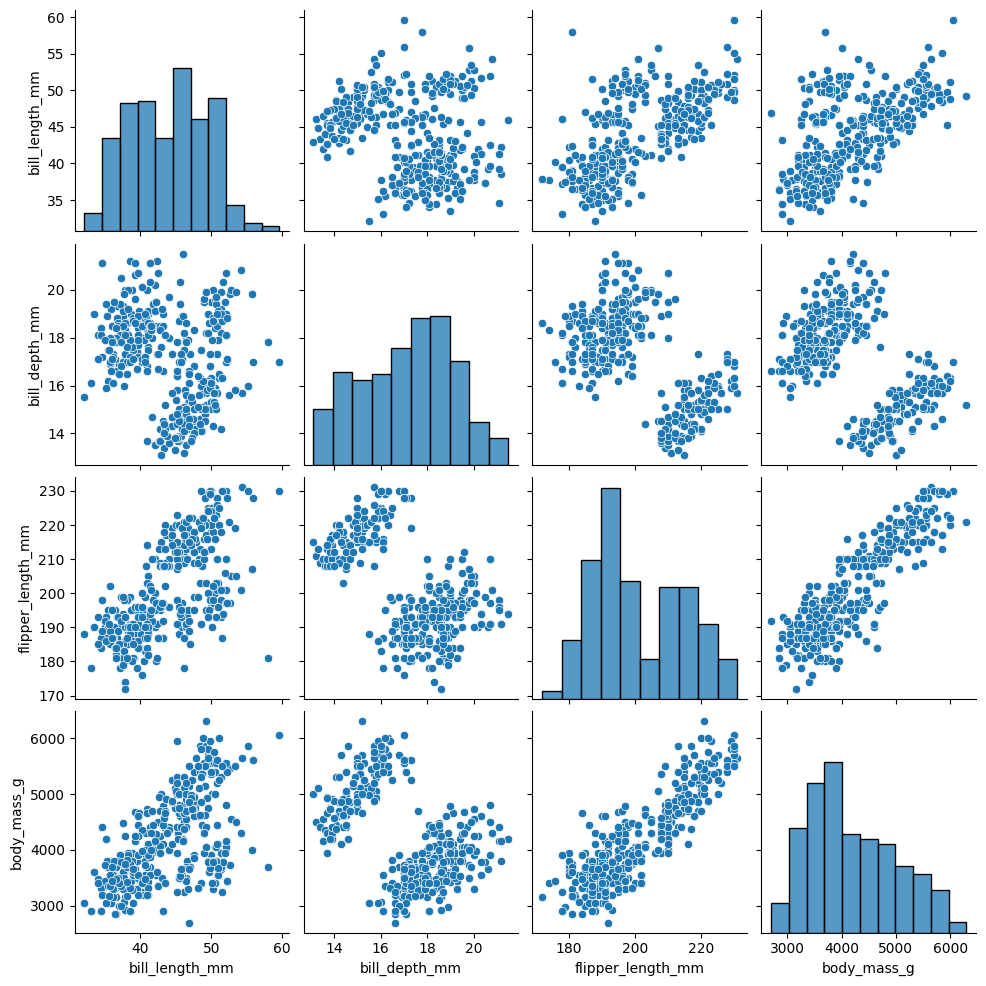

In [ ]:
#plot a pair plot
sns.pairplot(data[numericals])

As an addition to the linear relationship analysis, a pairplot is plotted over the numerical variables which afirms the claims of the relationships betwen the different variables.

##### *Replace the null values with means*

In [ ]:
data['sex'].replace('male',0,inplace=True)
data['sex'].replace('female',1,inplace=True)
data['species'].replace('Adelie',2,inplace=True)
data['species'].replace('Gentoo',3,inplace=True)
data['species'].replace('Chinstrap',4,inplace=True)
data = data.drop('island' , axis=1)
data.fillna(data.mean(),inplace=True)
data.head()

,rowid,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,2,39.10000,18.70000,181.000000,3750.000000,0.000000,2007
1,2,2,39.50000,17.40000,186.000000,3800.000000,1.000000,2007
2,3,2,40.30000,18.00000,195.000000,3250.000000,1.000000,2007
3,4,2,43.92193,17.15117,200.915205,4201.754386,0.495495,2007
4,5,2,36.70000,19.30000,193.000000,3450.000000,1.000000,2007


We do transform the non numeric variables to numerical, to prepare them for modeling, we code the data into normal variables

## ***Model building***

The problem we're modeling, now is to predict default on the specie of the penguin and also its body ass in g (body_mass_g)  or not default, the target variable is, multi class  and numeric respectively. Here I choose the two models

- LinearRegression
- KNearestNeighbours
- RandomForestClassifier

The choice of the model and modeling is based on few assumptions we make about the nature of our data and these assumptions include,

1. The Target Variable (Response) is a categorical variable for the classification and numeric for the regression.
2. The independent variables are not multicolinear
3. The data is not very highly skewed <br>
4. There are no extreme outliers.
5. There exists a linear relationship between each explanatory variable and the logit of the response variable.
6. The sample size is sufficiently large.
7. The hypothesis is that we can predict the response variables given the data set

the choice of the model here is the logistics regression model from the sklearn model. And then we model using the data which is prepared.
we shall select the best model based on the f- score. Then conclude accordingly

### ***Prepare the Data for modeling***

In [ ]:
# make copy of the data
data_regs = data.copy()
data_regs.head()

,rowid,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,2,39.10000,18.70000,181.000000,3750.000000,0.000000,2007
1,2,2,39.50000,17.40000,186.000000,3800.000000,1.000000,2007
2,3,2,40.30000,18.00000,195.000000,3250.000000,1.000000,2007
3,4,2,43.92193,17.15117,200.915205,4201.754386,0.495495,2007
4,5,2,36.70000,19.30000,193.000000,3450.000000,1.000000,2007


We make a copy of the data which we shall use for the regressor.

In [ ]:
# Split the data for Test and Training
# split data with sex as the response
X_train, X_test, y_train, y_test = train_test_split(data.drop(['rowid', 'species','year'], axis=1),
                                                    data['species'],
                                                    test_size=0.3,
                                                    random_state=SEED)

X_train_mass, X_test_mass, y_train_mass, y_test_mass= train_test_split(data_regs.drop(['rowid', 'body_mass_g', ], axis=1),
                                                    data['body_mass_g'],
                                                    test_size=0.3,
                                                    random_state=SEED)

We split the data into train and test sets in the ratio of 70% to 30% respectively and do that for both the regression and classification modeling data.

### ***Modeling using the LogisticRegression Classifier***

In [ ]:
# model building with  LogisticRegression Classifier
# model
model = LinearRegression()
# fit model
model.fit(X_train_mass,y_train_mass)

# test model
y_pred = model.predict(X_test_mass)
print(model.score(X_test_mass, y_test_mass))

0.7914658279935021


We instanciate a logistical regressor with the default hyperparemeters we fit the model on the training set X_train_mass and predict the on unseen data,
Then we score the model and performs with 79% accuracy_score for the target body_mass_g.

This suggests that, the base regessor fitted well one the data, and performs well.

In [65]:
# Evaluate the regressor
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_mass, y_pred)

289.9682548060247

### ***Modeling using K-nearest Neighbours (KNN)***

In [ ]:
# modeling using the K-nearest Neighbours (KNN)
knn = KNeighborsClassifier(n_neighbors=4)

# fit the model
smote_sampler = SMOTE(random_state=STATE)

pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', knn]])

pipeline.fit(X_train, y_train)

# test model

pred = pipeline.predict(X_test)

We set up the 4nn classifier with 4 neighbours  to instantiate a knn classifier, we setup a smote smapler to optimse the sampling per class because the classes aint evenly distributed.

We setup a pipepline for the model  fit the data to the model and then predict.

In [ ]:
# Evaluate the model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------CLASSIFICATION REPORT -----------------------")
print(classification_report(y_test, pred))
print("-------------------------TEST SCORES-----------------------")
print(f"confusion matrix : {confusion_matrix(y_test, pred)}")
print(f"Recall: { round(recall_score(y_test, pred, average='micro')*100, 4) }")
print(f"Precision: { round(precision_score(y_test, pred, average='micro')*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, pred, average='micro')*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, pred)*100, 4) }")

-------------------------CLASSIFICATION REPORT -----------------------
              precision    recall  f1-score   support

           2       0.75      0.69      0.72        48
           3       0.86      0.94      0.90        32
           4       0.52      0.54      0.53        24

    accuracy                           0.73       104
   macro avg       0.71      0.72      0.71       104
weighted avg       0.73      0.73      0.73       104

-------------------------TEST SCORES-----------------------
confusion matrix : [[33  4 11]
 [ 1 30  1]
 [10  1 13]]
Recall: 73.0769
Precision: 73.0769
F1-Score: 73.0769
Accuracy score: 73.0769


To evaluate the performance of the model, the variable being multi_class the accuracy of the model is 73% which means the model predicts the right values 73% of the time which is pretty good accuracy based on the micro averaging for the contributing species classes.

### ***Modeling Using the RandomForestClassifier***

In [ ]:
# modeling using the RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=SEED)

smote_sampler = SMOTE(random_state=STATE)

pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', rf_clf]])

pipeline.fit(X_train, y_train)

y_pred_c = pipeline.predict(X_test)

For the other classifier, which is a randomforestclassifier, we instantiate the bade classifier with the default hyperparemeters, we instantiate a smote_sampler for balanced sampling ans setup a pipepline for the model.

We fit the data to the pipeline and then predict given the X_test set.

-------------------------CLASSIFICATION REPORT -----------------------
              precision    recall  f1-score   support

           2       0.98      0.94      0.96        48
           3       1.00      0.97      0.98        32
           4       0.85      0.96      0.90        24

    accuracy                           0.95       104
   macro avg       0.94      0.95      0.95       104
weighted avg       0.96      0.95      0.95       104

-------------------------TEST SCORES-----------------------
confusion matrix : [[45  0  3]
 [ 0 31  1]
 [ 1  0 23]]
Recall: 95.1923
Precision: 95.1923
F1-Score: 95.1923
Accuracy score: 95.1923


<Axes: >

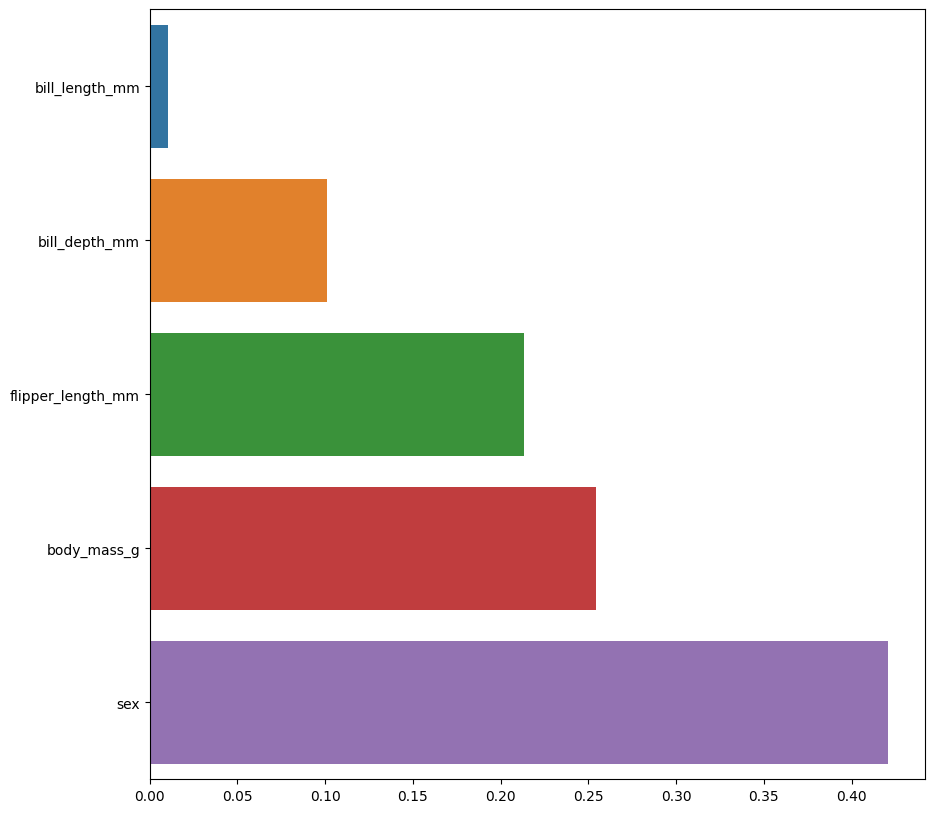

In [ ]:
# Evaluate the model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------CLASSIFICATION REPORT -----------------------")
print(classification_report(y_test, y_pred_c))
print("-------------------------TEST SCORES-----------------------")
print(f"confusion matrix : {confusion_matrix(y_test, y_pred_c)}")
print(f"Recall: { round(recall_score(y_test, y_pred_c,average='micro')*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred_c,average='micro')*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred_c, average='micro')*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred_c)*100, 4) }")

# plot feature importance's

plt.figure(figsize=(10,10))
sns.barplot(x=np.sort(rf_clf.feature_importances_), y=rf_clf.feature_names_in_,orient='h')

When looking that the evaluation metrics the accuracy_score stands out which induction that the model performed well in prediction 95% of the time which pretty good model performance for classifying species of penguins.

###### *In the Final Analysis*

The RandomForestClassifier performs better then the 4NN model when classifieing species of penguins which was the target variable choosen for classification modeling

With the LinearRegression model it performs well in prediction of my choosen target numeric variable (body_mass_g). With score kf 79.1%

Variables like year and island were left out of the clasaification modeling, with thr assumptions they may not contain predictive information.